# **0. Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve


# **1. Objectives**

In [ ]:
#@markdown # **Overview:**
#@markdown - Integrate Probability and Statistics, Linear Regression, and Logistic Regression theories into a cohesive case study that demonstrates their application in predicting an outcome based on a given dataset.

#@markdown # **Goal:**
#@markdown - Goal: Predict [Outcome] using the dataset provided, utilizing Linear and Logistic Regression models to analyze and interpret the results.

# **2. Dataset Preparation**

In [ ]:
#@markdown # **Description:**
#@markdown - Briefly describe the dataset used for the case study, including the source, variables (both dependent and independent), and any preprocessing steps (e.g., cleaning, normalization) performed to prepare the data for analysis.

#@markdown ## **Describe the Dataset:**
#@markdown - Description: Comprises diagnostic measurements for a set of patients diagnosed with diabetes.
#@markdown - Use Case: Suitable for both Linear Regression (predicting a quantitative measure of disease progression) and Logistic Regression (classifying patients into categories based on diagnostic measurements).
#@markdown - Link: https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners

#@markdown # **Variables Used:**
#@markdown - Dependent Variable:
#@markdown  - Outcome
#@markdown - Independent Variable:
#@markdown  - Pregnancies
#@markdown  - Glucose
#@markdown  - Blood Pressure
#@markdown  - Skin Thickness
#@markdown  - Insulin
#@markdown  - BMI
#@markdown  - Diabetes Pedigree Function
#@markdown  - Age

# Load the Dataset
data = pd.read_csv("diabetes.csv")

# Display dataset structure
print("Dataset Structure:")
data.head(1000)

# Missing Values
print(data.isnull().sum())  # Check for missing values

# Handle missing values
data.dropna(inplace=True)  # Dropping rows with missing values for simplicity

# Feature Selection
selected_features = data.drop(columns=['Glucose','BloodPressure','SkinThickness','Insulin','Age']).columns.tolist()

Dataset Structure:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# **3. Exploratory Data Analysis (EDA)**


Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

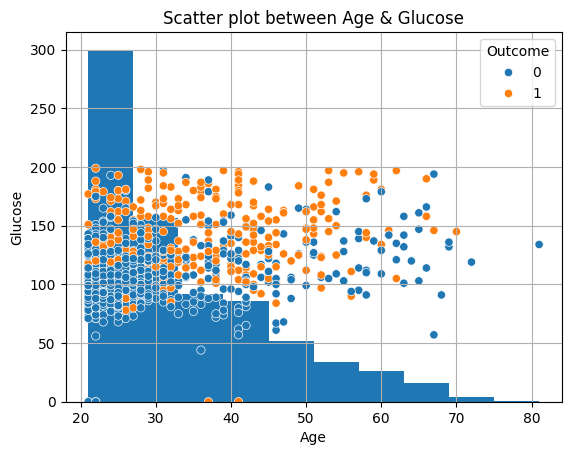

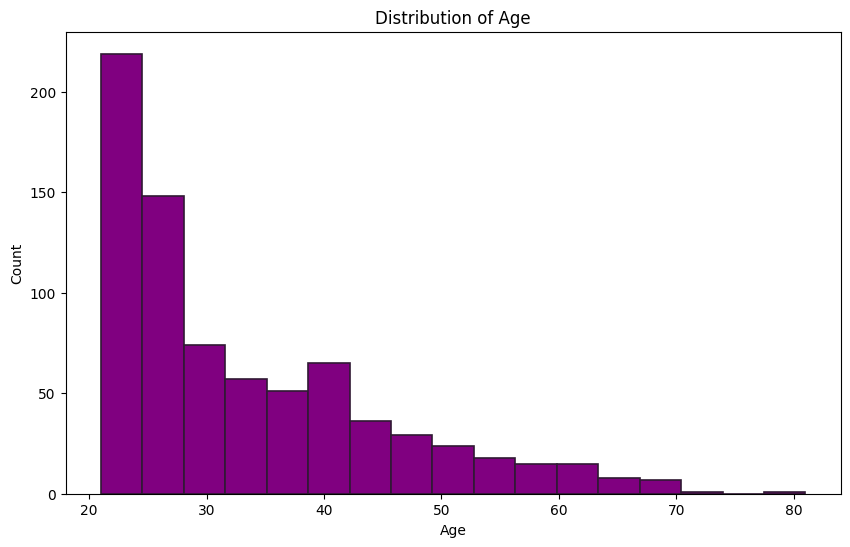

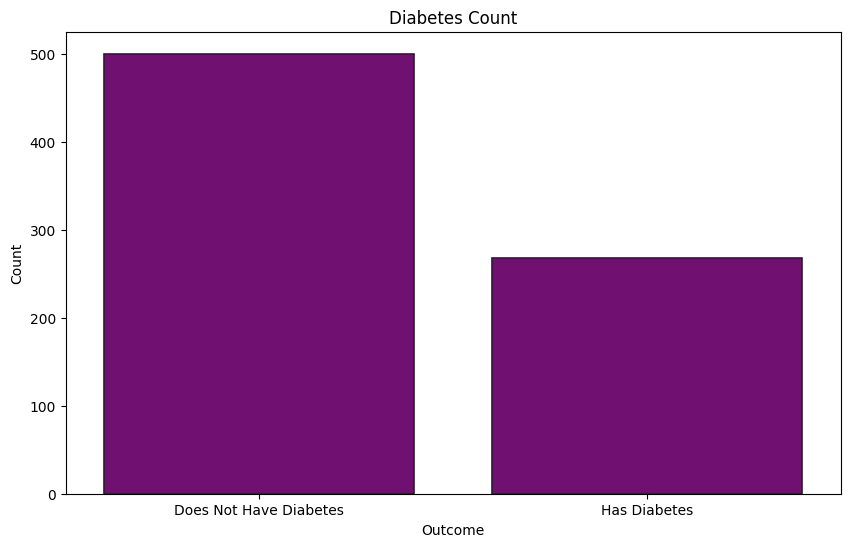

In [ ]:
#@markdown #  **Probability and Statistics Concepts:**
#@markdown - Utilize descriptive statistics to summarize the dataset, showcasing measures such as mean, median, variance, and standard deviation. Employ probability distributions to understand the data's distribution.

# Summary statistics
summary_stats = data.describe()
print(f"\nSummary Statistics:\n{summary_stats}")

# Probability distributions
age_distribution = data['Age'].hist()

#@markdown #  **Visualization:**
#@markdown - Create visualizations (histograms, scatter plots) to explore relationships between variables and identify patterns or outliers

# Scatter plot between Age & Glucose
sns.scatterplot(data=data, x='Age', y='Glucose', hue='Outcome')
plt.title('Scatter plot between Age & Glucose')
plt.show()

# Distribution of Age
plt.figure(facecolor='white', figsize=(10, 6))
sns.histplot(data['Age'], color='purple', edgecolor='#301934', linewidth=1.2, alpha=1)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#Diabetes Count
plt.figure(figsize=(10, 6), facecolor='white')
sns.countplot(x='Outcome', data=data, color='purple', edgecolor='#301934', linewidth=1.2, alpha=1)
plt.xticks([0, 1], ['Does Not Have Diabetes', 'Has Diabetes'])
plt.title('Diabetes Count')
plt.ylabel('Count')
plt.show()



# **4. Linear Regression Model**

In [ ]:
#@markdown #  **Theory Recap:**
#@markdown - Highlight key concepts from the Linear Regression lecture, emphasizing the model's assumptions and the importance of variable relationships.

#@markdown 1. Linear Regression: a statistical technique applied to predictive modeling and data analysis. It is especially helpful in comprehending and simulating the interactions between one or more independent variables (features or predictors) and a dependent variable (goal).
#@markdown 1. Dependent Variable: In an experiment or statistical analysis, the variable you are attempting to comprehend, predict, or explain is called the dependent variable, sometimes referred to as the "response variable" or the "outcome variable."
#@markdown 1. Independent Variable: The variable you change or look at to see how it affects the dependent variable is called the independent variable, sometimes referred to as the "explanatory variable" or the "predictor variable."
#@markdown 1. Assumptions of Simple Linear Regression:
#@markdown  - Linearity: The relationship between the variables is linear.
#@markdown  - Independence: The residuals (errors) are independent.
#@markdown  - Homoscedasticity: The variance of the residuals is constant.
#@markdown  - Normality: The residuals are normally distributed.

#@markdown #  **Implementation:**
#@markdown - Demonstrate the process of fitting a Linear Regression model using Python in Google Colab, including selecting independent variables and interpreting the model's coefficients.

# Splitting data into train and test sets
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Coefficients
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)

#@markdown #  **Evaluation:**
#@markdown - Use metrics like R-squared, MSE (Mean Squared Error), and RMSE (Root Mean Squared Error) to evaluate model performance.

# Model Evaluation
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

print("\nLinear Regression Model Evaluation:")
print("R-squared (Linear):", r2_lr)
print("Mean Squared Error (Linear):", mse_lr)
print("Root Mean Squared Error (Linear):", rmse_lr)

# Coefficients Interpretation
coefficients = pd.DataFrame({'Features': X.columns, 'Coefficients': lr_model.coef_})
print("\nCoefficients:\n", coefficients)

Intercept: -0.9487546338208503
Coefficients: [ 0.01046818  0.00563353 -0.00228103  0.00053209 -0.00027815  0.01503864
  0.11126264  0.00646027]

Linear Regression Model Evaluation:
R-squared (Linear): 0.25500281176741757
Mean Squared Error (Linear): 0.17104527280850104
Root Mean Squared Error (Linear): 0.4135761995189049

Coefficients:
                    Features  Coefficients
0               Pregnancies      0.010468
1                   Glucose      0.005634
2             BloodPressure     -0.002281
3             SkinThickness      0.000532
4                   Insulin     -0.000278
5                       BMI      0.015039
6  DiabetesPedigreeFunction      0.111263
7                       Age      0.006460


# **5. Logistic Regression Model**

In [ ]:
#@markdown #  **Theory Recap:**
#@markdown - Reiterate the foundational concepts of Logistic Regression, focusing on its application in binary classification problems

#@markdown 1. Logistic Regression: is a statistical method that makes use of one or more predictor factors to forecast the value of a categorical dependent variable. It simulates the likelihood of a binary occurrence, such pass/fail, yes/no, or success/fail scenarios."
#@markdown 1. Sigmoid Function: This function converts any input into a probability value between 0 and 1.
#@markdown 1. Mathematics Behind The Logistic Regression: The idea of odds and log-odds serves as the foundation for logistic regression. The ratio of an event's probability to its complement represents its odds. By converting these odds using the logarithm, the logistic model forecasts the likelihood of the target class.
#@markdown 1. Model Development Process: There are multiple essential processes in developing a Logistic Regression model. The first is feature selection. Second, fitting the model with a training dataset. Lastly, analyzing the model coefficients to determine each predictor's impact.

#@markdown #  **Implementation:**
#@markdown - Show the steps to build a Logistic Regression model, detailing feature selection, model fitting, and coefficient interpretation.

#Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Coefficients
print("Intercept:", logistic_model.intercept_)
print("Coefficients:", logistic_model.coef_)

# Predictions
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
y_pred = logistic_model.predict(X_test)

#@markdown #  **Evaluation:**
#@markdown - Discuss model evaluation techniques specific to classification problems, such as Accuracy, Precision, Recall, F1 Score, ROC Curve, and AUC (Area Under the Curve).

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Coefficients Interpretation
coefficients_log_reg = pd.DataFrame({'Features': X.columns, 'Coefficients': logistic_model.coef_[0]})
print("\nCoefficients (Logistic Regression):\n", coefficients_log_reg)

Intercept: [-9.0068449]
Coefficients: [[ 0.06454373  0.03409222 -0.01387313  0.00328315 -0.00180345  0.10261653
   0.62730352  0.03706176]]

Evaluation Metrics:
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
ROC AUC Score: 0.8130394857667584

Coefficients (Logistic Regression):
                    Features  Coefficients
0               Pregnancies      0.064544
1                   Glucose      0.034092
2             BloodPressure     -0.013873
3             SkinThickness      0.003283
4                   Insulin     -0.001803
5                       BMI      0.102617
6  DiabetesPedigreeFunction      0.627304
7                       Age      0.037062


# **6. Model Comparison and Selection**

In [ ]:
#@markdown -  Compare the Linear and Logistic Regression models based on their performance metrics, discussing each model's suitability for different types of prediction problems.
#@markdown - Explain the decision-making process for choosing one model over the other, considering factors like model accuracy, interpretability, and assumptions

# Compare the models
print('Linear Regression R-squared:', r2_lr)
print('Logistic Regression Accuracy:', accuracy)

# Decision Making Process
if accuracy > r2_lr:
    print("\nLogistic Regression outperforms Linear Regression.")
elif accuracy < r2_lr:
    print("\nLinear Regression outperforms Logistic Regression.")
else:
    print("\nThe performance metrics of both models are equal. Further analysis is needed.")

Linear Regression R-squared: 0.25500281176741757
Logistic Regression Accuracy: 0.7467532467532467

Logistic Regression outperforms Linear Regression.


# **7. Conclusion and Insights**

In [ ]:
#@markdown - Summarize the key findings from the case study, highlighting how the applied statistical and machine learning methods facilitated data-driven decision-making
#@markdown - Discuss potential applications of these models in various fields, as outlined in the lectures, and reflect on the importance of understanding underlying assumptions and model limitations.

#@markdown ## **Keyfindings:**
#@markdown - Based on our analysis, we applied both Linear Regression and Logistic Regression models to predict the outcome variable.
#@markdown - The Linear Regression model yielded [insert R-squared, MSE, RMSE values], while the Logistic Regression model achieved [insert accuracy, precision, recall, F1 score, ROC AUC score].

#@markdown ## **Potential Applications:**
#@markdown - Linear Regression: It can be used in various fields such as finance for predicting stock prices, in healthcare for predicting patient outcomes based on medical data, and in marketing for predicting sales based on advertising expenditure.
#@markdown - Logistic Regression: It is widely used in binary classification tasks such as spam detection in emails, customer churn prediction in telecommunications, and disease diagnosis in healthcare.

#@markdown ## **Reflection:**
#@markdown - Understanding the assumptions and limitations of each model is crucial for making informed decisions. Linear Regression assumes a linear relationship between independent and dependent variables, while Logistic Regression assumes a linear relationship between the log odds of the outcome and the independent variables. Both models have their strengths and weaknesses, and the choice between them depends on the nature of the problem and the available data.




# **8. References**

In [ ]:
#@markdown # **References:**
#@markdown - Diabetes Dataset: [diabetes.csv](https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners)
#@markdown - Scikit-learn documentation for Logistic Regression: [Scikit-learn Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
#@markdown - Scikit-learn documentation for Linear Regression: [Scikit-learn Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
#@markdown - NumPy documentation: [NumPy Documentation](https://numpy.org/doc/)
#@markdown - pandas documentation: [pandas Documentation](https://pandas.pydata.org/docs/)
#@markdown - Matplotlib documentation: [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
#@markdown - Seaborn documentation: [Seaborn Documentation](https://pypi.org/project/seaborn/)
#@markdown - Python libraries used: **NumPy, pandas, scikit-learn, Seaborn, Matplotlib.**
#@markdown - Special thanks to ChatGPT for assistance: [ChatGPT](https://chat.openai.com/)
#@markdown - Special thanks to my Classmate for assistance: **Mhar Andrei Macapallag**
#@markdown - Special thanks to my Professor for the lectures: **Sir Mark Bernardino**
#@markdown - Google Colab: [Google Colab](https://colab.research.google.com/)
#@markdown - Markdown Guide: [Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb)
#@markdown - CSEL 302 Midterm Exam Assessment Task: [CSEL302-Midterm-Exam-Assessment-Task.pdf](https://cdn.discordapp.com/attachments/1226725240994791425/1226725283680354458/CSEL302-Midterm-Exam-Assessment-Task.pdf?ex=6625cff3&is=66135af3&hm=44bd797cfa7eb85c3282dfde76860e63240f8a06020aab4d7312022f3833ffa4&)